In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras import models
from keras import layers
from keras import regularizers

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam, SGD


Using TensorFlow backend.


# Import data and clean

In [2]:
#  data is from kaggle - https://www.kaggle.com/datamunge/sign-language-mnist
testdf=pd.read_csv('sign_mnist_test.csv')
traindf=pd.read_csv('sign_mnist_train.csv')

In [3]:
traindf.shape, traindf.head()

((27455, 785),
    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0      3     107     118     127     134     139     143     146     150   
 1      6     155     157     156     156     156     157     156     158   
 2      2     187     188     188     187     187     186     187     188   
 3      2     211     211     212     212     211     210     211     210   
 4     13     164     167     170     172     176     179     180     184   
 
    pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0     153  ...       207       207       207       207       206       206   
 1     158  ...        69       149       128        87        94       163   
 2     187  ...       202       201       200       199       198       199   
 3     210  ...       235       234       233       231       230       226   
 4     185  ...        92       105       105       108       133       163   
 
    pixel781  pixel782  pixel783  pixel784  


In [4]:
testdf.shape, testdf.head()

((7172, 785),
    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0      6     149     149     150     150     150     151     151     150   
 1      5     126     128     131     132     133     134     135     135   
 2     10      85      88      92      96     105     123     135     143   
 3      0     203     205     207     206     207     209     210     209   
 4      3     188     191     193     195     199     201     202     203   
 
    pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0     151  ...       138       148       127        89        82        96   
 1     136  ...        47       104       194       183       186       184   
 2     147  ...        68       166       242       227       230       227   
 3     210  ...       154       248       247       248       253       236   
 4     203  ...        26        40        64        48        29        46   
 
    pixel781  pixel782  pixel783  pixel784  
 

In [5]:
# create training labels
labelstr = traindf['label']
traindf.drop(columns =['label'], inplace = True)
traindf.shape, labelstr.head()

((27455, 784), 0     3
 1     6
 2     2
 3     2
 4    13
 Name: label, dtype: int64)

In [6]:
# create testing labels

labelstt = testdf['label']
testdf.drop(columns =['label'], inplace = True)
testdf.shape, labelstt.head()

((7172, 784), 0     6
 1     5
 2    10
 3     0
 4     3
 Name: label, dtype: int64)

In [7]:
# no 9(J) or 25(Z)
labelstr.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [8]:
# turn test csvs into matrix, flatten, standardize
imagestest = testdf.values
imagestest = np.array([np.reshape(i, (28, 28)) for i in imagestest])
imagestest = np.array([i.flatten() for i in imagestest])
imagestest = imagestest/255

In [9]:
# turn train csvs into matrix, flatten, standardize
images = traindf.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])
images = images/255

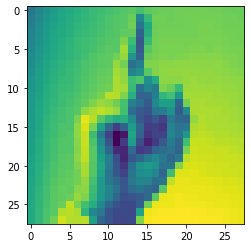

In [10]:
plt.imshow(images[0].reshape(28,28))

In [11]:
labelstr[0]

3

In [12]:
# train validate split
image_train, image_val, label_train, label_val = train_test_split(images, labelstr, random_state=23, train_size=.8)

In [13]:
# turn labels into single row matrixes
num_classes = 25
label_train = keras.utils.to_categorical(label_train, num_classes)
label_val = keras.utils.to_categorical(label_val, num_classes)
labelstt = keras.utils.to_categorical(labelstt, num_classes)

In [14]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

#  MLP

## Relu

In [ ]:
model = models.Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=(784,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(25, activation='sigmoid'))

In [ ]:
model.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

histoire = model.fit(image_train,
                    label_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(image_val, label_val))

In [ ]:
visualize_training_results(histoire)

In [ ]:
results_test1 = model.evaluate(imagestest, labelstt)

In [ ]:
results_test1

## Softmax

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(80, activation='relu', input_shape=(784,)))
model2.add(layers.Dense(40, activation='relu'))
model2.add(layers.Dense(20, activation='relu'))
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(25, activation='softmax'))

In [ ]:
model2.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

history = model2.fit(image_train,
                    label_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(image_val, label_val))

In [ ]:
visualize_training_results(history)

In [ ]:
results_test2 = model2.evaluate(imagestest, labelstt)

In [ ]:
results_test2

### Hypertuning

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(80, activation='relu', input_shape=(784,)))
model3.add(layers.Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.005),))
model3.add(layers.Dense(20, activation='relu'))
model3.add(layers.Dense(10, activation='relu'))
model3.add(layers.Dense(25, activation='softmax'))

model3.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

history3 = model3.fit(image_train,
                    label_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(image_val, label_val))

In [ ]:
results_test3 = model3.evaluate(imagestest, labelstt)

In [ ]:
results_test3

# CNN

In [15]:
image_train  = np.array([np.reshape(i, (28, 28)) for i in image_train])
image_val  = np.array([np.reshape(i, (28, 28)) for i in image_val])
imagestest  = np.array([np.reshape(i, (28, 28)) for i in imagestest])

In [16]:
modelcnn = models.Sequential()
modelcnn.add(layers.Conv1D(32, (3), activation='relu',
                        input_shape=(28, 28)))
modelcnn.add(layers.MaxPooling1D((2)))

modelcnn.add(layers.Conv1D(64, (3), activation='relu'))
modelcnn.add(layers.MaxPooling1D((2)))

modelcnn.add(layers.Conv1D(128, (3), activation='relu'))
modelcnn.add(layers.MaxPooling1D((2)))


modelcnn.add(layers.Flatten())
modelcnn.add(layers.Dense(64, activation='relu'))
modelcnn.add(layers.Dropout(.1))

modelcnn.add(layers.Dense(25, activation='softmax'))

modelcnn.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

In [17]:
results = modelcnn.fit(image_train,
                      label_train,
                      epochs = 20,
                      batch_size=32,
                      validation_data=(image_val, label_val))

Train on 21964 samples, validate on 5491 samples
Epoch 1/20
21964/21964 [==============================] - 4s 160us/step - loss: 3.1755 - accuracy: 0.0624 - val_loss: 3.1130 - val_accuracy: 0.1255
Epoch 2/20
21964/21964 [==============================] - 3s 144us/step - loss: 2.9339 - accuracy: 0.1302 - val_loss: 2.7139 - val_accuracy: 0.1894
Epoch 3/20
21964/21964 [==============================] - 3s 144us/step - loss: 2.4261 - accuracy: 0.2518 - val_loss: 2.0695 - val_accuracy: 0.3553
Epoch 4/20
21964/21964 [==============================] - 3s 144us/step - loss: 1.9430 - accuracy: 0.3837 - val_loss: 1.7218 - val_accuracy: 0.4629
Epoch 5/20
21964/21964 [==============================] - 4s 171us/step - loss: 1.5937 - accuracy: 0.4862 - val_loss: 1.2880 - val_accuracy: 0.6012
Epoch 6/20
21964/21964 [==============================] - 3s 142us/step - loss: 1.3130 - accuracy: 0.5718 - val_loss: 1.1455 - val_accuracy: 0.6329
Epoch 7/20
21964/21964 [==============================] - 3s 14

In [31]:
modelcnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 26, 32)            2720      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 13, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 11, 64)            6208      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3, 128)            24704     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [ ]:
visualize_training_results(results)

# Evaluating 

In [18]:
results_testcnn = modelcnn.evaluate(imagestest, labelstt)

7172/7172 [==============================] - 0s 44us/step


In [19]:
results_testcnn

[0.6859614916989342, 0.8225041627883911]

## EDA 

In [ ]:
predict = modelcnn.predict(imagestest)

In [ ]:
predict

In [ ]:
predict_labels=np.argmax(predict, axis=1)
predict_labels

In [ ]:
import tensorflow as tf

In [ ]:
modelcnn.get_layer(index= 4).output

In [ ]:
modelcnn.outputs

In [ ]:
# with tf.GradientTape() as tape:
last_conv_layer = modelcnn.get_layer(index = 4)
iterate = tf.keras.models.Model([modelcnn.inputs], [modelcnn.output, last_conv_layer.output])
model_out, last_conv_layer = iterate(imagestest)
class_out = model_out[:, np.argmax(model_out[0])]
grads = tape.gradient(class_out, last_conv_layer)
pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

In [ ]:
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((8, 8))
plt.matshow(heatmap)
plt.show()

## 2nd attempt

## Attempt 3

In [54]:
imagesh  = np.array([np.reshape(imagestest[0], (28, 28))])
imagesh.shape

(1, 28, 28)

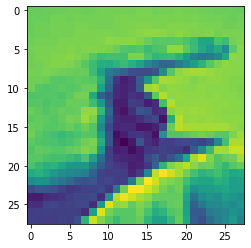

In [68]:
imageheat = np.expand_dims(imagestest[0], axis=0)

imageheat.shape
plt.imshow(imagestest[0].reshape(28,28))
imagestest[0].shape

TypeError: Invalid shape (26,) for image data

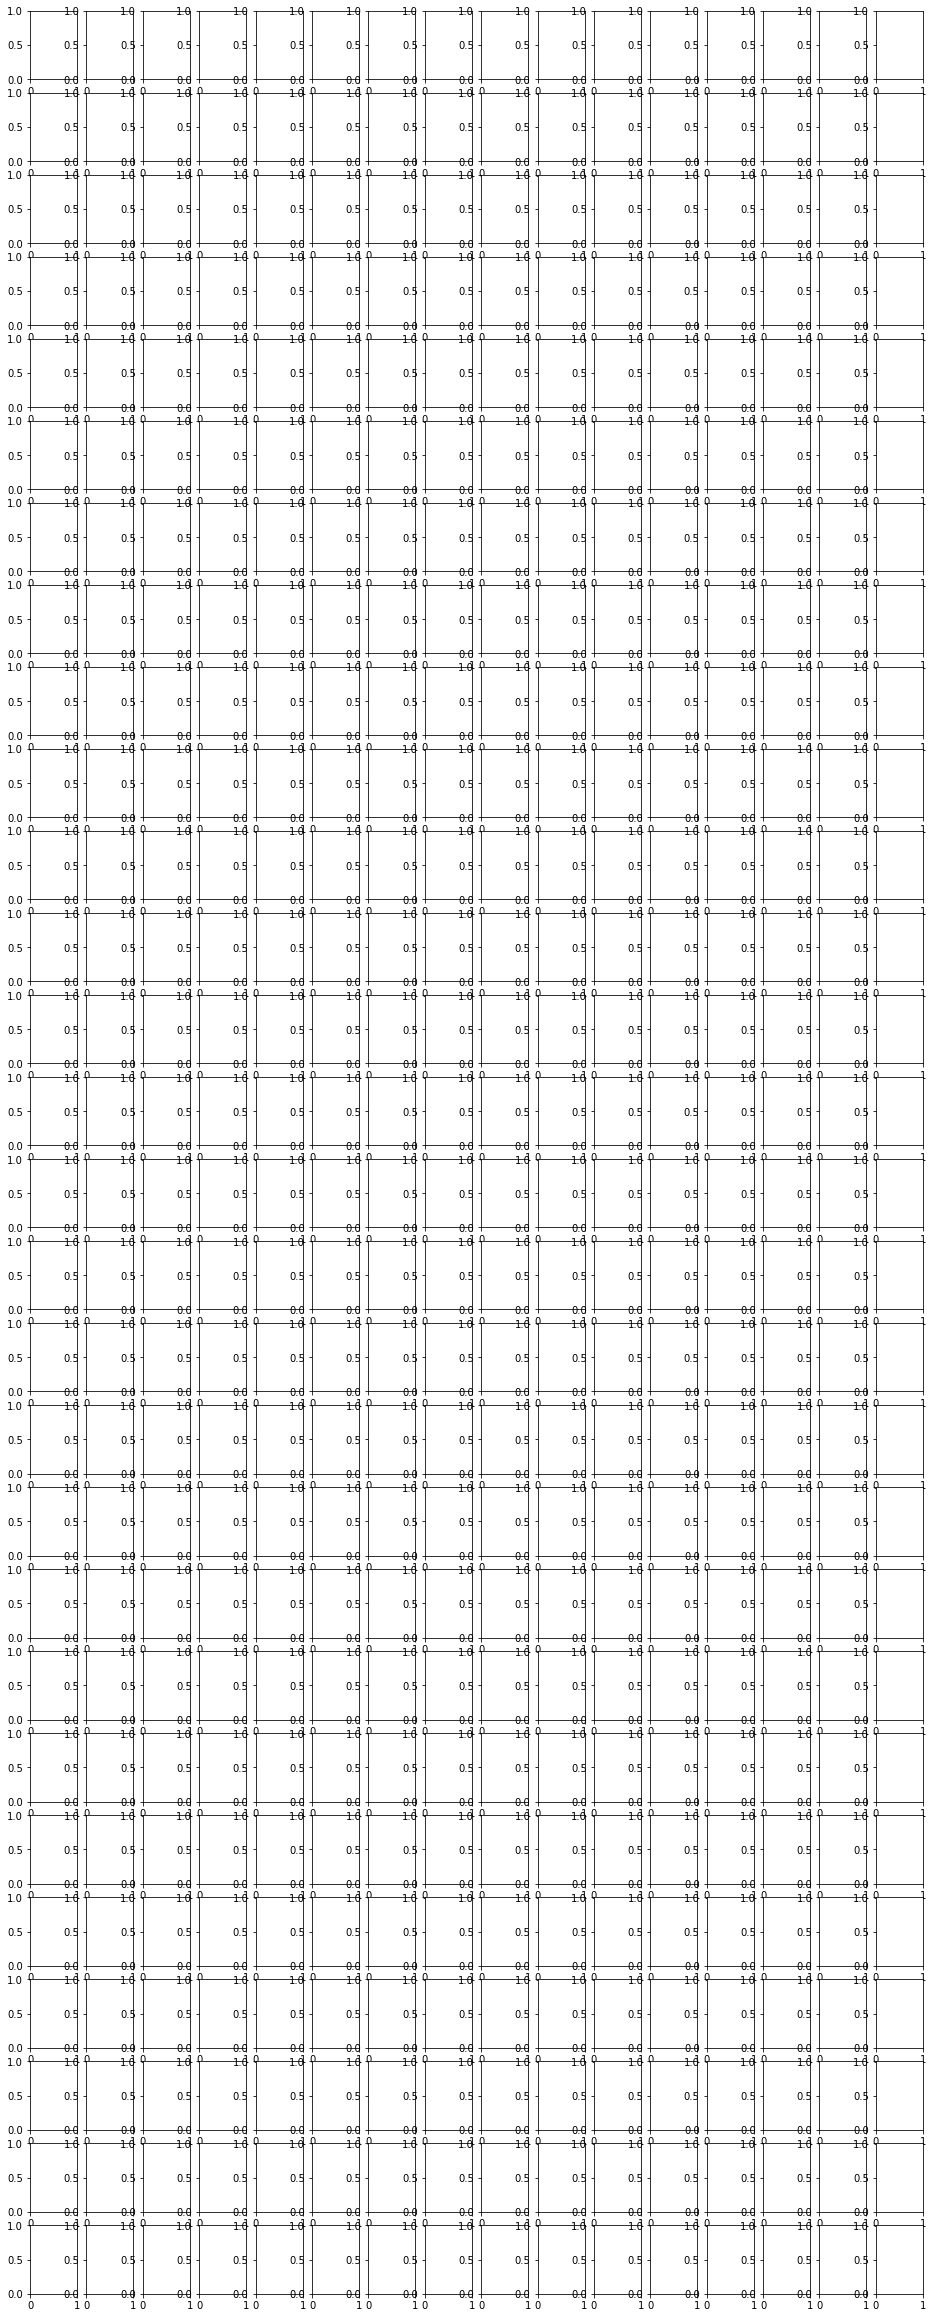

In [69]:
from keras import models
import math 

# Extract model layer outputs
layer_outputs = [layer.output for layer in modelcnn.layers[:6]]

# Create a model for displaying the feature maps
activation_model = models.Model(inputs=modelcnn.input, outputs=layer_outputs)

activations = activation_model.predict(imageheat)

# Extract Layer Names for Labelling
layer_names = []
for layer in modelcnn.layers[:6]:
    layer_names.append(layer.name)

total_features = sum([a.shape[-1] for a in activations])
total_features

n_cols = 16
n_rows = math.ceil(total_features / n_cols)


iteration = 0
fig , axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols, n_rows*1.5))

for layer_n, layer_activation in enumerate(activations):
    n_channels = layer_activation.shape[-1]
    for ch_idx in range(n_channels):
        row = iteration // n_cols
        column = iteration % n_cols
    
        ax = axes[row, column]

        channel_image = layer_activation[0,
                                          :,
                                         ch_idx]
        # Post-process the feature to make it visually palatable
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')

        ax.imshow(channel_image, aspect='auto', cmap='viridis')
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        
        if ch_idx == 0:
            ax.set_title(layer_names[layer_n], fontsize=10)
        iteration += 1

fig.subplots_adjust(hspace=1.25)
plt.savefig('Intermediate_Activations_Visualized.pdf')
plt.show()

# Transfer learning